In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
credit_card = pd.read_csv('C:\\Users\\acerpc\\Desktop\\code&data\\creditcard_exp.csv',skipinitialspace=True)
credit_card.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [3]:
exp = credit_card[credit_card.avg_exp.notnull()].copy().iloc[:,2:].drop('age2',axis=1)
exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


In [4]:
exp_new = credit_card[credit_card['avg_exp'].isnull()].copy().iloc[:, 2:]\
.drop('age2',axis=1)

In [5]:
exp['Income_ln'] = np.log(exp['Income'])

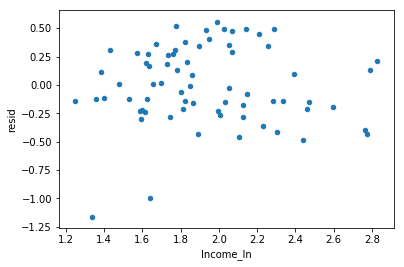

In [6]:
ana3 = ols('avg_exp_ln ~ Income_ln', exp).fit()
exp['Pred'] = ana3.predict(exp)
exp['resid'] = ana3.resid
exp.plot('Income_ln', 'resid',kind='scatter')
plt.show()

In [7]:
exp['resid_t'] = \
(exp['resid'] - exp['resid'].mean()) / exp['resid'].std()

In [8]:
exp2 = exp[abs(exp['resid_t']) <= 2].copy()

In [9]:
exp2['dist_home_val_ln'] = np.log(exp2['dist_home_val'])
exp2['dist_avg_income_ln'] = np.log(exp2['dist_avg_income'])

In [10]:
exp2['high_avg_ratio'] = exp2['high_avg'] / exp2['dist_avg_income']

In [11]:
#岭回归
exp.columns

Index(['avg_exp', 'avg_exp_ln', 'gender', 'Age', 'Income', 'Ownrent',
       'Selfempl', 'dist_home_val', 'dist_avg_income', 'high_avg', 'edu_class',
       'Income_ln', 'Pred', 'resid', 'resid_t'],
      dtype='object')

In [12]:
model1 = ols('avg_exp~dist_home_val+dist_avg_income',data=exp).fit_regularized(alpha=1,L1_wt=0)
# L1_wt参数为0则使用岭回归，为1使用lasso
model1.predict(exp_new)

2     955.665295
11    746.790069
13    670.735523
19    704.143543
20    479.764744
21    739.256873
24    450.305957
28    676.980234
31    489.282088
33    445.249738
36    475.422639
37    454.021506
38    360.262612
44    294.726220
50    637.370038
53    560.988828
59    387.406841
63    316.255690
65    457.222212
66    544.658435
70    445.110791
77    246.297128
79    513.680081
86    429.546679
88    433.455316
90    548.395998
91    433.442104
92    444.574911
95    362.129346
99    473.312722
dtype: float64

In [13]:
#lasso回归
model2 = ols('avg_exp~dist_home_val+dist_avg_income',data=exp).fit_regularized(alpha=1,L1_wt=1)
model2.predict(exp_new)

2     957.185227
11    728.840333
13    694.698216
19    694.891748
20    534.956810
21    722.333521
24    506.710134
28    671.256724
31    504.241546
33    490.273100
36    513.334786
37    495.557153
38    401.634698
44    349.757396
50    619.389402
53    531.427411
59    425.555658
63    356.548289
65    460.988789
66    550.754509
70    475.804764
77    296.464792
79    490.899749
86    441.483510
88    440.046886
90    535.725058
91    433.151754
92    455.069006
95    369.718773
99    450.773514
dtype: float64

In [14]:
#使用scikit-learn进行正则化参数调优
from sklearn.preprocessing import StandardScaler
continous_xcols = ['Age', 'Income', 'dist_home_val', 
                    'dist_avg_income']#抽取连续变量
scaler = StandardScaler()#标准化
X = scaler.fit_transform(exp[continous_xcols])
Y = exp.avg_exp_ln

In [15]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-2,3,100,base=10)
#Search the min MSE by CV
rcv = RidgeCV(alphas=alphas,store_cv_values=True)
rcv.fit(X,Y)

RidgeCV(alphas=array([1.00000e-02, 1.12332e-02, ..., 8.90215e+02, 1.00000e+03]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [16]:
print('The best alpha is {}'.format(rcv.alpha_))
print('The r-square is {}'.format(rcv.score(X, Y))) 
# Default score is rsquared

The best alpha is 0.2915053062825176
The r-square is 0.4756826777019494


In [17]:
#预测
x_new = scaler.transform(exp_new[continous_xcols])
np.exp(rcv.predict(x_new))[:5]

array([759.67677561, 606.74024213, 661.20654568, 681.888929  ,
       641.06967182])

In [19]:
cv_values = rcv.cv_values_
cv_values

array([[0.21129554, 0.21152135, 0.21177413, ..., 0.03272074, 0.03768135,
        0.0425524 ],
       [0.08974745, 0.08988788, 0.09004512, ..., 0.05635722, 0.06148689,
        0.06640098],
       [0.04243246, 0.04253866, 0.04265764, ..., 0.00772601, 0.0068911 ,
        0.00616317],
       ...,
       [0.04811891, 0.04811999, 0.04812121, ..., 0.14128122, 0.14345414,
        0.14547353],
       [0.05350093, 0.05354761, 0.05359987, ..., 0.46246591, 0.47282523,
        0.48247957],
       [1.62702549, 1.62738113, 1.62777917, ..., 2.732574  , 2.75239783,
        2.77075326]])

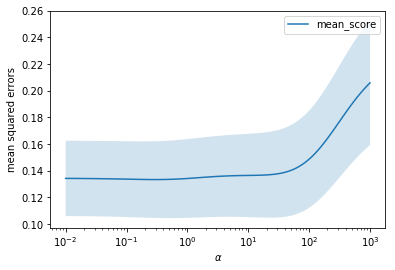

In [20]:
n_fold, n_alphas = cv_values.shape

cv_mean = cv_values.mean(axis=0)
cv_std = cv_values.std(axis=0)
ub = cv_mean + cv_std / np.sqrt(n_fold)
lb = cv_mean - cv_std / np.sqrt(n_fold)

plt.semilogx(alphas, cv_mean, label='mean_score')
plt.fill_between(alphas, lb, ub, alpha=0.2)
plt.xlabel("$\\alpha$")
plt.ylabel("mean squared errors")
plt.legend(loc="best")
plt.show()

In [21]:
rcv.coef_

array([ 0.03321449, -0.30956185,  0.05551208,  0.59067449])

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge()
coef = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X,Y)
    coef.append(ridge.coef_)

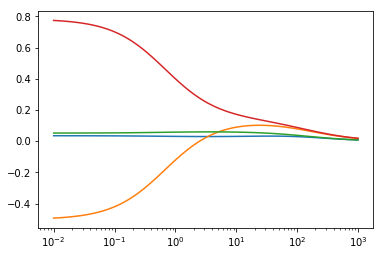

In [37]:
plt.plot(alphas,coef)
plt.gca().set_xscale('log')

In [41]:
ridge.set_params(alpha=15)
ridge.fit(X,Y)
ridge.coef_

array([0.03181203, 0.09904695, 0.05701938, 0.15538204])

In [42]:
ridge.score(X,Y)

0.44251122568163836

In [43]:
np.exp(ridge.predict(x_new))[:5]

array([931.24941783, 706.98117231, 681.41796781, 733.02433367,
       671.70061743])

In [44]:
#lasso
from sklearn.linear_model import LassoCV
lasso_alphas = np.logspace(-3,0,100,base=10)
lcv = LassoCV(alphas=lasso_alphas,cv=10)
lcv.fit(X,Y)

LassoCV(alphas=array([0.001  , 0.00107, ..., 0.9326 , 1.     ]), copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [45]:
print('The best alpha is {}'.format(lcv.alpha_))
print('The r-square is {}'.format(lcv.score(X, Y))) 
# Default score is rsquared

The best alpha is 0.04037017258596556
The r-square is 0.4426451069862233


In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_coef = []
for alpha in lasso_alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X,Y)
    lasso_coef.append(lasso.coef_)

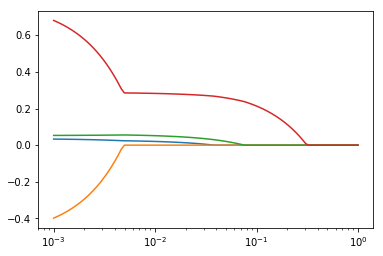

In [59]:
ax = plt.gca()
ax.set_xscale('log')
plt.plot(lasso_alphas, lasso_coef)

In [48]:
lcv.coef_

array([0.        , 0.        , 0.02789489, 0.26549855])

In [60]:
lasso.set_params(alpha=20)
np.exp(lasso.predict(x_new))

array([886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703, 886.94868703, 886.94868703,
       886.94868703, 886.94868703])

In [55]:
lasso.coef_

array([0., 0., 0., 0.])

In [64]:
#弹性网络

In [63]:
from sklearn.linear_model import ElasticNetCV

l1_ratio = [0.01, .1, .5, .7, .9, .95, .99, 1]

encv = ElasticNetCV(l1_ratio=l1_ratio)
encv.fit(X, Y)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [65]:
print('The best l1_ratio is {}'.format(encv.l1_ratio_))
print('The best alpha is {}'.format(encv.alpha_))

The best l1_ratio is 0.01
The best alpha is 1.0998728529638144
